# Data BootCamp Final Project

## Relationship Between Environmental Risk and Return

### Lyndsay Maggin
### May 2020


#### Table of Contents
##### [Introduction](#Introduction)
##### [Data Import](#Data_Import)
##### [Sector Analysis](#Sector_Analysis)
##### [Relative Value](#Relative_Value)
##### [Data Cleaning](#Data_Cleaning)
##### [Data and Regression Analysis](#Data_Analysis_and_Regression)<br>

### Introduction

Environmental, Social and Governmental investing recently dominated the World Economic Forum in Davos, Switzerland this past year. As climate change becomes more evident in our everyday life investors are beginning to focus more heavily on firms environmental impact. As ESG becomes a larger focus in the financial industry with leaders such as Larry Fink from BlackRock and Jamie Dimon from JP Morgan at the forefront of the endeavour, we can expect to see exponential gains in the sector as a whole.

For this project, I have collected a list of North American companies that report environmental risks in their financial statements from Bloomberg. Unfortunately, the list is fairly small with only 65 companies. From Bloomberg, I narrowed down my environmental factors to four essential reported items:
 Green House Gas Emissions to dollar millions in sales
 Water usage to dollar millions in sales
 Nitrogen Oxide Emissions to dollar millions in sales
 Sulphur Dioxide Emissions to dollar millions in sales

I then pulled 10 years of annually reported data from each company along with 10 years of fiscal returns. In the below analysis you will find an attempt to uncover a relationship between these environmental factors and company returns as compared to their peers within the same sector.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf

### Data_Import

In [113]:
sector=pd.read_csv('C:/Users/ljmag/OneDrive/Documents/LMaggin/Spring 2020/Data Bootcamp/final_proj/sector.csv')
returns=pd.read_csv('C:/Users/ljmag/OneDrive/Documents/LMaggin/Spring 2020/Data Bootcamp/final_proj/returns.csv')
ghg=pd.read_csv('C:/Users/ljmag/OneDrive/Documents/LMaggin/Spring 2020/Data Bootcamp/final_proj/ghg.csv')
nitrogen=pd.read_csv('C:/Users/ljmag/OneDrive/Documents/LMaggin/Spring 2020/Data Bootcamp/final_proj/nitrogen_ox.csv')
sulphur=pd.read_csv('C:/Users/ljmag/OneDrive/Documents/LMaggin/Spring 2020/Data Bootcamp/final_proj/sulphur_diox.csv')
water=pd.read_csv('C:/Users/ljmag/OneDrive/Documents/LMaggin/Spring 2020/Data Bootcamp/final_proj/water.csv')

In [114]:
returns.shape
#I have 65 secturities aka rows in my dataset and 10 years of return history

(65, 12)

In [115]:
returns.head(5)

,Security,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,VEON US Equity,-32.53008,7.610213,18.61547,-20.68171,-67.54101,40.443660,19.17054,-32.93219,NaN,NaN,NaN
1,UAL US Equity,24.22849,-7.519210,27.19023,-14.33697,76.81734,61.804960,23.90037,-20.78086,84.50813,17.150630,-66.82008
2,MTN US Equity,34.21773,50.401410,33.48047,48.41306,14.68066,36.765240,10.18222,21.17066,32.40126,-29.148090,-24.59384
3,SHLDQ US Equity,-76.68085,-65.843030,-60.52782,-41.77148,16.43617,-25.909570,18.79043,-44.52279,-11.76154,133.492500,-63.25362
4,ASNA US Equity,67.84969,-67.326060,-39.32119,-23.80952,-15.16854,6.556442,11.47124,30.74366,49.78220,0.752351,-7.96307


Of the 65 securities I want to see the number of securities classified in each sector

In [116]:
sector['Sector'].value_counts()

Consumer Discretionary    17
Technology                11
Materials                 10
Consumer Staples           8
Industrials                7
Utilities                  5
Health Care                2
Financials                 2
Energy                     2
Communications             1
Name: Sector, dtype: int64

### Sector_Analysis

My goal is to uncover a potential relationship between a environmental risk factor and a company's returns. However, there is high level dependent volatility among companies of different sectors. For instance, a company in the energy sector will be have much larger levels of green house gas emmissions compared to a company in the technology sector. I therefore will measure these environmental factors relative to the median of their sector. However, any sector with less than 5 members I believe will bias the data and therefore will remove these securities from my datasets

In [117]:
sector_list=['Health Care', 'Financials', 'Energy', 'Communications']
sector=sector.loc[~sector['Sector'].isin(sector_list)]
security_list=sector['Security']

table_list=[returns, ghg, nitrogen, sulphur, water]
for i in table_list:
    i=i.loc[i['Security'].isin(security_list)]

I will now only be analyzing Consumer Discretionary, Technology, Materials, Consumer Staples, Industrials, and Utilities.
To better understand these different sectors I would like to look at a summary of their return statistics over the past 10 years.

In [118]:
m_returns=returns.merge(sector, left_on='Security', right_on='Security', how='inner')
sector_returns=m_returns.groupby('Sector').mean()
sector_returns

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Sector,,,,,,,,,,,
Consumer Discretionary,0.513965,35.362141,5.694676,-7.242856,14.716413,19.566653,16.550443,8.484324,59.275228,56.016536,-37.624138
Consumer Staples,13.981475,2.862208,4.774695,12.384084,24.630555,29.289205,12.269877,21.935744,25.986226,11.838892,-16.151838
Industrials,-10.640593,27.456221,12.539828,-32.984414,-7.739077,42.464245,6.404943,-14.787838,28.009089,1.296352,-37.494037
Materials,-35.972801,59.064946,82.399439,-18.109322,-8.274279,-14.524079,-1.521978,-17.738524,51.293376,23.326237,-54.044283
Technology,12.947607,20.130535,8.355493,20.062269,19.000183,39.084641,2.206483,-10.142940,29.570326,-0.039191,-13.734793
Utilities,6.503630,10.074054,15.098958,-11.261221,31.692595,15.128472,1.572801,14.914049,-5.274378,6.779149,-33.181588


In [119]:
sector_median=m_returns.groupby('Sector').median()
sector_median

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Sector,,,,,,,,,,,
Consumer Discretionary,6.044955,38.340320,3.800222,-14.336970,16.268050,15.898660,12.353310,11.620440,30.264060,38.727090,-38.674350
Consumer Staples,8.376815,4.445657,0.628183,8.798617,19.646310,32.177565,12.325057,11.774755,17.162920,-4.145632,-12.591010
Industrials,-9.952195,28.440410,13.071840,-29.116930,-14.033570,41.434170,17.798225,-18.225935,39.579425,4.947477,-33.832075
Materials,-36.482730,39.453900,82.191780,-44.653615,-7.142629,-15.671101,-5.173548,-20.712330,47.741940,-1.952141,-76.224440
Technology,22.692860,24.112460,3.986928,12.087910,19.535890,40.900510,1.306138,-14.776857,13.309940,-1.745849,-8.465643
Utilities,4.462726,15.047640,10.149560,-13.166580,29.995060,16.822695,-0.093434,13.498443,-6.904003,0.974073,-32.222510


Text(0.5, 0, 'Year')

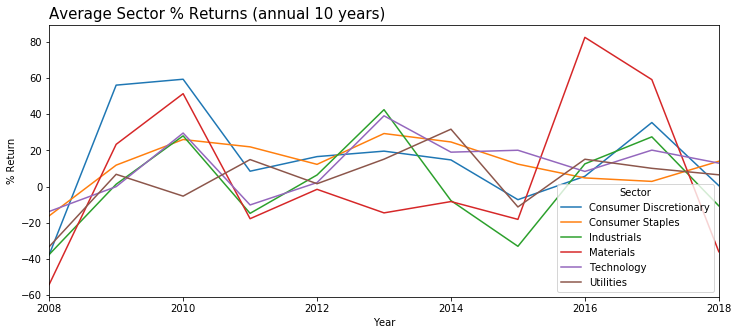

In [120]:
fig,ax=plt.subplots()

sector_returns.T.sort_index(ascending=True).plot(ax=ax, figsize=(12,5))
ax.set_title('Average Sector % Returns (annual 10 years)', size=15, loc='left')
ax.set_ylabel('% Return', size=10)
ax.set_xlabel('Year', size=10)

In [121]:
sector_vol=m_returns.groupby('Sector').std()
sector_vol

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Sector,,,,,,,,,,,
Consumer Discretionary,39.646077,63.799265,37.343354,24.096694,43.699596,25.319902,24.997869,33.632796,124.369574,68.698129,18.386884
Consumer Staples,25.972860,20.125001,22.316218,15.910257,31.634985,14.806058,11.100633,28.272004,34.235135,39.471861,22.149867
Industrials,39.204330,18.984647,27.120478,24.866372,35.519433,23.965967,23.497945,25.871163,30.341145,23.430838,18.842786
Materials,38.925299,48.745784,76.478533,64.579226,14.107272,44.447593,27.043321,30.487523,21.039586,61.034720,46.472693
Technology,25.356525,27.453228,20.780114,48.792651,19.718350,29.620373,8.521986,21.456113,45.367776,38.949210,16.062773
Utilities,9.360042,8.927552,13.440888,13.135467,6.600523,14.918570,25.133952,7.223702,9.253872,21.345415,4.619741


Text(0.5, 0, 'Year')

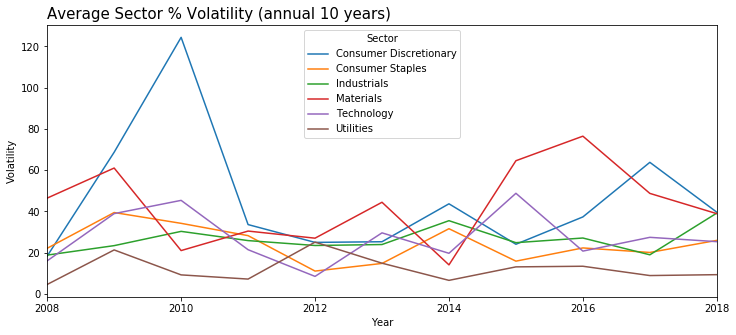

In [122]:
fig,ax=plt.subplots()

sector_vol.T.sort_index(ascending=True).plot(ax=ax, figsize=(12,5))
ax.set_title('Average Sector % Volatility (annual 10 years)', size=15, loc='left')
ax.set_ylabel('Volatility', size=10)
ax.set_xlabel('Year', size=10)

In [123]:
sec_ret_t=sector_returns.T
sectors_sd=list(sec_ret_t.columns)
for i in sectors_sd:
    sd=np.std(sec_ret_t[i])
    print(i,'      standard deviation:', round(sd, 2))
#np.std(sec_ret_t['Consumer Discretionary'])

Consumer Discretionary       standard deviation: 26.42
Consumer Staples       standard deviation: 12.33
Industrials       standard deviation: 24.14
Materials       standard deviation: 40.67
Technology       standard deviation: 15.46
Utilities       standard deviation: 16.2


I can see that the Materials sector over the past few years has shown the highest amount of volatility whereas the utilities sector has been fairly consistent even during the crisis. Note that these average and standard deviation values are based off of this small sample of securities and therefore will not match the market. However from this information I can see that it is necessary to separate the secturities based on their sector due to large differences in sector volatilities.  I therefore want to chart the individual materials securities against the average value to find the largest contributor.

In [124]:
material_returns=m_returns[m_returns['Sector']=='Materials']
del material_returns['Sector']
material_returns.set_index('Security')

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Security,,,,,,,,,,,
S CN Equity,-73.837210,29.323310,82.191780,-75.43916,-17.998830,-32.863640,8.408037,-33.79264,31.41301,113.875900,-75.69888
GSM US Equity,-90.054400,49.584490,4.483604,-36.17272,-2.826928,33.433040,4.467714,-20.71233,83.56342,NaN,NaN
TROX US Equity,-61.622960,100.777200,181.154000,-81.84435,7.778831,32.300080,-15.069830,30.43478,NaN,NaN,NaN
VRS US Equity,27.490040,147.464800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVIA US Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDV CN Equity,-12.836520,27.766700,162.909600,79.52941,-11.458330,-76.811590,-14.814810,-13.52313,58.75706,5.085048,-79.35488
TSE US Equity,-35.656040,24.880910,112.905600,61.60458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSTM US Equity,-37.309420,88.983050,-23.376620,-53.13451,-29.394070,NaN,NaN,NaN,NaN,NaN,NaN
AEM CN Equity,-3.955899,3.739108,56.528110,27.18818,4.253651,-44.723800,43.323450,-51.09930,34.99145,-8.989331,15.62663


Text(0.5, 0, 'Year')

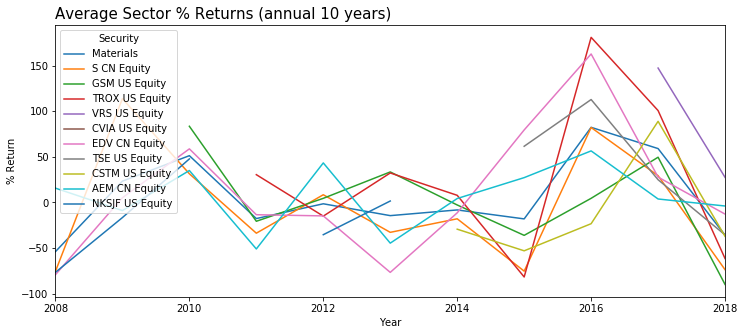

In [125]:
fig,ax=plt.subplots()

sector_returns.loc[['Materials']].T.sort_index(ascending=True).plot(ax=ax, figsize=(12,5))
material_returns.set_index('Security').T.sort_index(ascending=True).plot(ax=ax, figsize=(12,5))
ax.set_title('Average Sector % Returns (annual 10 years)', size=15, loc='left')
ax.set_ylabel('% Return', size=10)
ax.set_xlabel('Year', size=10)

It looks like the largest contributors to volatility between 2015 and 2018 are TROX US Equity, EDV CN Equity and VRS US Equity

TROX: Tronox Holdings PLC operates as a holding company. The Company, through its subsidiaries, produces chemical products such as mineral sands, paints, and plastics. Tronox Holdings markets its products in the United Kingdom.

EDV: Endeavour Mining Corporation is a gold mining company. The Company engages in gold mine production, development and exploration activities in West Africa. Endeavour Mining operates mining projects located in Mali, Burkina Faso, and Cote d'Ivoire.

VRS: Verso Corporation operates in the paper industry. The Company produces coated freesheet, coated ground wood, and uncoated super calendered papers and pulp. Verso offers its products to magazine and catalog publishers, commercial printers, specialty retail merchandisers, and paper merchants.

### Relative_Value

In order to understand the relationship between environmental factors and company returns I decide to calculate the median of each environmental value within a sector. I then calculate the distance of each company's environmental factor to it's peer group median. In order to standardize these values among companies with vastly different sizes I adjust the values using natural logs. 

In [126]:
ghg_ln=ghg.set_index('Security').apply(lambda x: np.log(x))
nitrogen_ln=nitrogen.set_index('Security').apply(lambda x: np.log(x))
sulphur_ln=sulphur.set_index('Security').apply(lambda x: np.log(x))
water_ln=water.set_index('Security').apply(lambda x: np.log(x))


C:\Users\ljmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [127]:
ghg_ln=ghg_ln.merge(sector, left_on='Security', right_on='Security', how='inner')
nitrogen_ln=nitrogen_ln.merge(sector, left_on='Security', right_on='Security', how='inner')
sulphur_ln=sulphur_ln.merge(sector, left_on='Security', right_on='Security', how='inner')
water_ln=water_ln.merge(sector, left_on='Security', right_on='Security', how='inner')

I now want to calculate the median environmental factor for each sector for each year

In [128]:
dfs=[ghg_ln, nitrogen_ln, sulphur_ln, water_ln]
for df in dfs:
    df['sector_median_2018'] = df.groupby('Sector')['2018'].transform('median')
    df['sector_median_2017'] = df.groupby('Sector')['2017'].transform('median')
    df['sector_median_2016'] = df.groupby('Sector')['2016'].transform('median')
    df['sector_median_2015'] = df.groupby('Sector')['2015'].transform('median')
    df['sector_median_2014'] = df.groupby('Sector')['2014'].transform('median')
    df['sector_median_2013'] = df.groupby('Sector')['2013'].transform('median')
    df['sector_median_2012'] = df.groupby('Sector')['2012'].transform('median')
    df['sector_median_2011'] = df.groupby('Sector')['2011'].transform('median')
    df['sector_median_2010'] = df.groupby('Sector')['2010'].transform('median')
    df['sector_median_2009'] = df.groupby('Sector')['2009'].transform('median')
    df['sector_median_2008'] = df.groupby('Sector')['2008'].transform('median')
    

Now I will replace the data in each dataframe with the factor relative to the median for that sector for that year. I am saving these as new dataframes.

In [129]:
ghg_ln2=ghg_ln
nitrogen_ln2= nitrogen_ln
sulphur_ln2=sulphur_ln
water_ln2=water_ln
df_list=[ghg_ln2, nitrogen_ln2, sulphur_ln2, water_ln2]
for df in df_list:
    df['2018']=df['2018']-df['sector_median_2018']
    df['2017']=df['2017']-df['sector_median_2017']
    df['2016']=df['2016']-df['sector_median_2016']
    df['2015']=df['2015']-df['sector_median_2015']
    df['2014']=df['2014']-df['sector_median_2014']
    df['2013']=df['2013']-df['sector_median_2013']
    df['2012']=df['2012']-df['sector_median_2012']
    df['2011']=df['2011']-df['sector_median_2011']
    df['2010']=df['2010']-df['sector_median_2010']
    df['2009']=df['2009']-df['sector_median_2009']
    df['2008']=df['2008']-df['sector_median_2008']
    

In [130]:
ghg_ln2.shape

(58, 24)

### Data_Cleaning

I will now put my dataframe into a preferable state to merge with returns and run a linear regression.

In [131]:
m_returns.shape

(58, 13)

In [132]:
list_securities=m_returns['Security']

In [133]:
df_list=[ghg_ln2, nitrogen_ln2, sulphur_ln2, water_ln2]
for df in df_list:
    df = df[df['Security'].isin(list_securities)]
    df = df.sort_values('Security')
    print(df.shape)

(58, 24)
(58, 24)
(58, 24)
(58, 24)


In [134]:
ghg_ln2=ghg_ln2.reset_index()
ghg_ln2 = pd.wide_to_long(ghg_ln2, stubnames = ['20'], i='index', j='year')[['Security', '20']]

In [135]:
nitrogen_ln2=nitrogen_ln2.reset_index()
nitrogen_ln2 = pd.wide_to_long(nitrogen_ln2, stubnames = ['20'], i='index', j='year')[['Security', '20']]

In [136]:
sulphur_ln2=sulphur_ln2.reset_index()
sulphur_ln2 = pd.wide_to_long(sulphur_ln2, stubnames = ['20'], i='index', j='year')[['Security', '20']]

In [137]:
water_ln2=water_ln2.reset_index()
water_ln2 = pd.wide_to_long(water_ln2, stubnames = ['20'], i='index', j='year')[['Security', '20']]

In [138]:
ghg_ln2=ghg_ln2.rename(columns={'20': 'ghg'})
nitrogen_ln2=nitrogen_ln2.rename(columns={'20': 'nitrogen'})
sulphur_ln2=sulphur_ln2.rename(columns={'20': 'sulphur'})
water_ln2=water_ln2.rename(columns={'20': 'water'})

In [139]:
returns = m_returns.reset_index()
returns = pd.wide_to_long(returns, stubnames = ['20'], i='index', j='year')
returns=returns.rename(columns={'20': 'return'})
returns.columns = map(str.lower, returns.columns)

In [140]:
final_df = ghg_ln2.rename(columns={'20':'ghg','index':'security'}).merge(returns.rename(columns={'20':'returns','index':'security'}),on=['year','index'])

In [141]:
returns.columns = map(str.lower, returns.columns)
returns=returns[['security', 'return']]
returns.shape

(638, 2)

In [142]:
ghg_ln2.columns=map(str.lower, ghg_ln2.columns)
nitrogen_ln2.columns=map(str.lower, nitrogen_ln2.columns)
sulphur_ln2.columns=map(str.lower, sulphur_ln2.columns)
water_ln2.columns=map(str.lower, water_ln2.columns)

In [143]:
final_df=returns.merge(ghg_ln2, on=['year', 'security'], how='inner')

In [144]:
final_df=final_df.merge(nitrogen_ln2, on=['year', 'security'], how='inner')
final_df=final_df.merge(sulphur_ln2, on=['year', 'security'], how='inner')
final_df=final_df.merge(water_ln2, on=['year', 'security'], how='inner')
final_df.sort_values('security')

,security,return,ghg,nitrogen,sulphur,water
year,,,,,,
10,AEE US Equity,6.872346,2.044913,NaN,NaN,NaN
14,AEE US Equity,32.725410,0.930124,1.793712,2.899276,0.492848
18,AEE US Equity,13.975490,0.922754,2.009945,6.157942,3.761873
13,AEE US Equity,23.308950,1.730419,NaN,NaN,NaN
9,AEE US Equity,-10.399390,1.916773,NaN,NaN,NaN
12,AEE US Equity,-2.528128,2.076462,1.801991,2.898310,NaN
15,AEE US Equity,-2.366613,0.861831,3.518433,5.427066,0.921530
17,AEE US Equity,15.958160,0.984554,2.035950,3.955270,3.921591
11,AEE US Equity,23.918940,2.376007,NaN,NaN,NaN


Due to the limited amount of data available, I decided not to use time as a variable in my regression. I could have done multiple regressions separately per year however the limited amount of data would skew this. 

Prior to creating a linear regression model, I will look at the distribution of each factor and then plot said factor against corresponding returns. 

In [145]:
final_df.sort_values('nitrogen', ascending=False).head(2)

,security,return,ghg,nitrogen,sulphur,water
year,,,,,,
14,UAL US Equity,76.81734,3.355477,inf,3.958906,0.003008
13,UAL US Equity,61.80496,3.363545,inf,3.726409,-1.037120


In [146]:
from numpy import inf
final_df=final_df.replace([np.inf, -np.inf], np.nan) #2 nitrogen values were inf due to limited data

### Data_Analysis_and_Regression

Text(0.5, 1.0, 'Water')

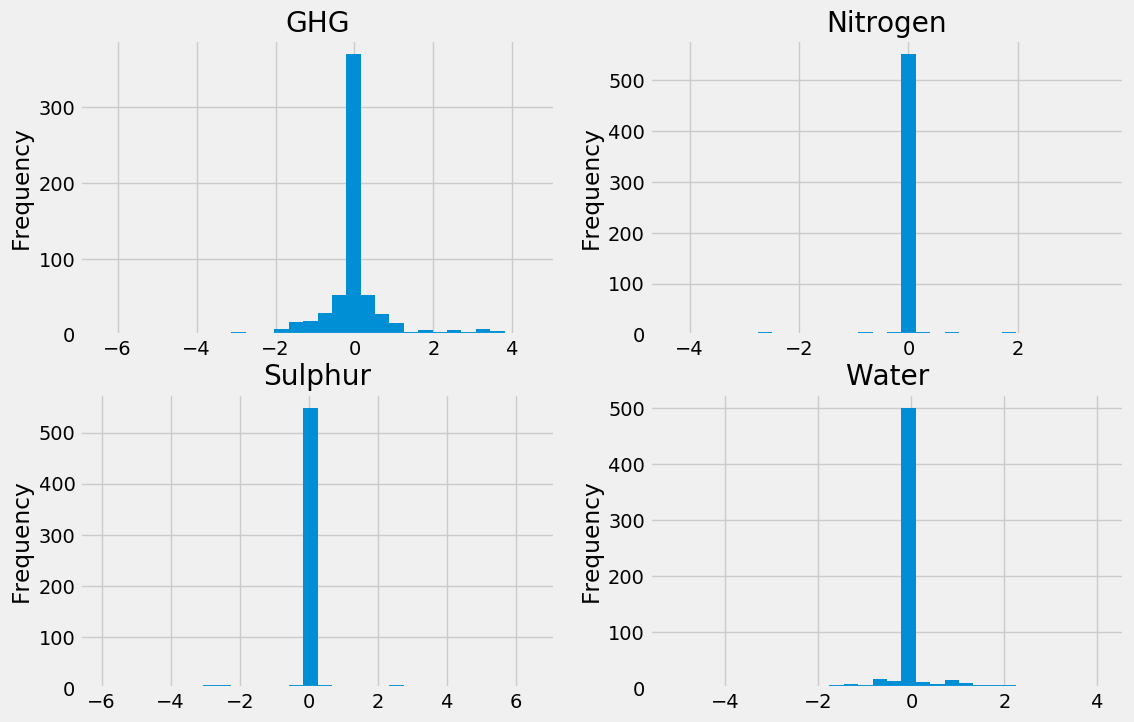

In [168]:
plt.style.use('fivethirtyeight')
fig,(ax)=plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,8))
final_df['ghg'].plot.hist(bins=30, ax=ax[0,0]).set_title('GHG')
final_df['nitrogen'].plot.hist(bins=30, ax=ax[0,1]).set_title('Nitrogen')
final_df['sulphur'].plot.hist(bins=30, ax=ax[1,0]).set_title('Sulphur')
final_df['water'].plot.hist(bins=30, ax=ax[1,1]).set_title('Water')

The distributions are highly leptokurtoic however, taking the natural log of the data creates further skewness. I therefore decide to move forward with the original differenced values. 

C:\Users\ljmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ljmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ljmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\ljmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\Users\ljmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\ljmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ljmag\Anaconda3\lib\site-packa

Text(0.5, 1.0, 'Water')

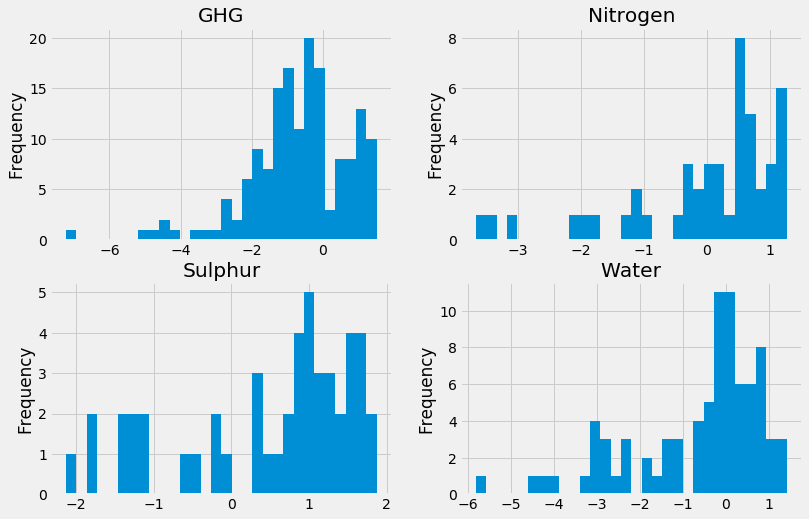

In [164]:
plt.style.use('fivethirtyeight')
fig,(ax)=plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,8))
np.log(final_df['ghg']).replace([np.inf, -np.inf], np.nan).plot.hist(bins=30, ax=ax[0,0]).set_title('GHG')
np.log(final_df['nitrogen']).replace([np.inf, -np.inf], np.nan).plot.hist(bins=30, ax=ax[0,1]).set_title('Nitrogen')
np.log(final_df['sulphur']).replace([np.inf, -np.inf], np.nan).plot.hist(bins=30, ax=ax[1,0]).set_title('Sulphur')
np.log(final_df['water']).replace([np.inf, -np.inf], np.nan).plot.hist(bins=30, ax=ax[1,1]).set_title('Water')

Text(0.5, 1.0, 'Water')

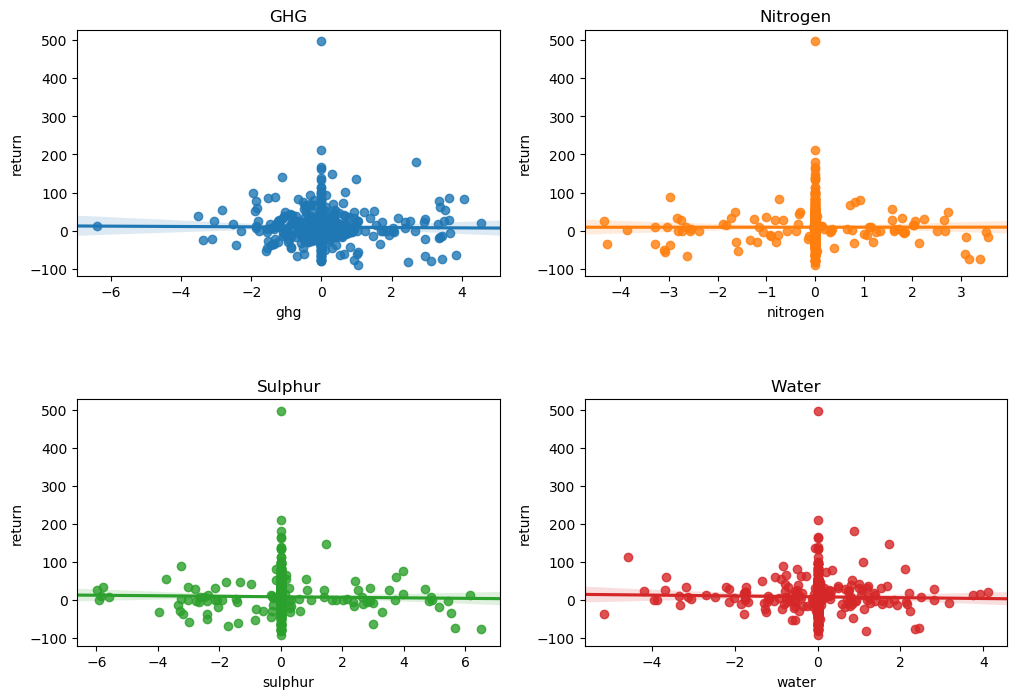

In [167]:
plt.rcParams.update(plt.rcParamsDefault)
fig,(ax)=plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(12,8))
plt.subplots_adjust(hspace = 0.5)
sns.regplot(final_df['ghg'],final_df['return'],ax=ax[0,0]).set_title('GHG')
sns.regplot(final_df['nitrogen'],final_df['return'],ax=ax[0,1]).set_title('Nitrogen')
sns.regplot(final_df['sulphur'],final_df['return'],ax=ax[1,0]).set_title('Sulphur')
sns.regplot(final_df['water'],final_df['return'],ax=ax[1,1]).set_title('Water')

Looking at the scatterplots above I am not seeing a distinct linear relationship between returns and any of the factors. However, a true security factor model is all encompassing. We would expect a firm's return to be highly dependent on a variety of other market factors and internally specific factors. For this project I am searching for even a minimal relationship that might help support the case for increased firm ESG disclosure. I will therefore attempt to fit a linear model for each factor in order to uncover an Rsquared value.  

In [150]:
final_df=final_df.fillna(0) 

In [151]:
headers=final_df.columns

In [152]:
headers=list(headers[1:])
headers

['return', 'ghg', 'nitrogen', 'sulphur', 'water']

In [162]:
for i in headers:
    final_df[i]=round(final_df[i], 5).astype(str)
    final_df[i]=pd.to_numeric(final_df[i])


In [158]:
final_df=final_df.reset_index(drop=True)
final_df.to_csv('df.csv')
#for some reason no matter how I transformed the data I would get an Error evaluating factor: SyntaxError: unexpected EOF while parsing
#when trying to run the regression, spoke to Ben and decided to export the df and then reimport which worked, I believe this to be a jupyter limitation with parsing


In [159]:
data=pd.read_csv('test.csv') 

In [160]:
ghg = smf.ols('returns ~ ghg', data).fit()

In [161]:
print(ghg.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06734
Date:                Mon, 27 Apr 2020   Prob (F-statistic):              0.795
Time:                        11:30:25   Log-Likelihood:                -3288.2
No. Observations:                 638   AIC:                             6580.
Df Residuals:                     636   BIC:                             6589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0456      1.663      5.440      0.0

Looking at the F statistic of the above regression between annual returns and annual reportedgreen house gas emmisions relative to emissions of the specified sector you can see that there is not a statistically significant relationship between the two variables. The F statistic is close to 0 and the adjusted R squared of this regression is 0 as well. However, this does not mean that the relationship does not exist, it simply means that a linear model relationship does not fit well for this dataset.

I do still believe that there is a relationship between stock returns and environmental impact. In order to prove this relationship I will need to analyze other factors. For instance I can take a pool of securities and set a binomial to whether the company reports green house gas emissions. Since ESG figures are self reported, you can assume that companies with high environmental risk will choose not to report this data. Additionally, there are third party providers that release ESG scores for companies, rather than pulling in annual reported GHG, Sulphur, Water, etc I could regress an ESG risk score to stock returns. This would also allow me to use more frequent return data rather than annual. I believe one of the largest contributors to lack of fit for the above model was the missing data and data frequency.